In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [2]:
simple_grammar.strip().split('\n')

['sentence => noun_phrase verb_phrase',
 'noun_phrase => Article Adj* noun',
 'Adj* => null | Adj Adj*',
 'verb_phrase => verb noun_phrase',
 'Article =>  一个 | 这个',
 'noun =>   女人 |  篮球 | 桌子 | 小猫',
 'verb => 看着   |  坐在 |  听着 | 看见',
 'Adj =>  蓝色的 | 好看的 | 小小的']

In [3]:
grammar = {}
sep = '=>'
for s in simple_grammar.strip().split('\n'):
    exp, stmt = s.split(sep)
    grammar[exp.strip()] = [sub_gram.split() for sub_gram in stmt.split('|')]
    
grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [4]:
def create_grammar(simple_grammar, split='=>', line_split='\n'):
    simple_grammar_list = simple_grammar.strip().split(line_split)
    grammar = {}
    for s in simple_grammar_list:
        exp, stmt = s.split(split)
        grammar[exp.strip()] = [sub_gram.split() for sub_gram in stmt.split('|')]
    return grammar

In [5]:
grammar = create_grammar(simple_grammar)

In [6]:
grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [7]:
from random import choice
def generate(grammar, target):
    if not target in grammar:
        return target
    expand = [generate(grammar,t) for t in choice(grammar[target])]
    return ''.join([e if e != '/n' else '\n' for e in expand if e != 'null'])

In [8]:
generate(grammar=grammar,target='sentence')

'这个桌子看见这个蓝色的桌子'

In [9]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [10]:
grammar_0 = create_grammar(simple_grammar=human, split='=', line_split='\n')

In [11]:
generate(grammar=grammar_0, target='human')

'我想找点玩的'

In [12]:
grammar_1 = create_grammar(simple_grammar=host, split='=', line_split='\n')

In [13]:
generate(grammar=grammar_1, target='host')

'小朋友,你好我是5号,您需要打牌吗？'

In [14]:
for i in range(20):
    print(generate(grammar=grammar_1, target='host'))

小朋友,你好我是2号,请问你要打猎吗？
小朋友,您好我是633号,请问你要赌博吗？
您好我是8号,您需要打牌吗？
小朋友,你好我是66号,您需要喝酒吗？
先生,你好我是8186号,您需要赌博吗？
您好我是58号,请问你要赌博吗？
小朋友,你好我是8号,请问你要打牌吗？
先生,你好我是591号,请问你要喝酒吗？
您好我是9号,您需要喝酒吗？
女士,你好我是1号,您需要打猎吗？
女士,你好我是64号,请问你要打猎吗？
你好我是147号,请问你要赌博吗？
您好我是28号,请问你要打牌吗？
先生,你好我是16号,请问你要赌博吗？
你好我是92738号,请问你要赌博吗？
先生,你好我是23381号,请问你要赌博吗？
女士,您好我是251号,请问你要打猎吗？
小朋友,您好我是6号,请问你要赌博吗？
女士,你好我是5号,您需要喝酒吗？
先生,您好我是3号,请问你要打猎吗？


## 导入电影评论文件分词

In [15]:
import pandas as pd

In [16]:
filename = r'C:\Users\zhang\Desktop\jupyters_and_slides\2019-summer\assignments\movie_comments.txt'

In [17]:
content = pd.read_csv(filename, ',')

C:\Users\zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
comments = content['comment']

In [19]:
comments_list = comments.tolist()

In [20]:
len(comments_list)

261497

In [21]:
import re
import jieba
from collections import Counter

In [22]:
comments_list = [''.join(re.findall('\w+', comment)) for comment in comments_list if type(comment) == str]

In [23]:
TOKEN = []
for comment in comments_list:
    TOKEN += list(jieba.cut(comment))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhang\AppData\Local\Temp\jieba.cache
Loading model cost 1.148 seconds.
Prefix dict has been built succesfully.


In [24]:
words_count = Counter(TOKEN)

In [25]:
len(words_count)

164391

In [26]:
words_count.most_common(10)

[('的', 328262),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290)]

In [27]:
frequiences = [f for _, f in words_count.most_common(100)]

In [28]:
x = [n for n in range(100)]

In [29]:
from matplotlib import pyplot as plt
import numpy as np

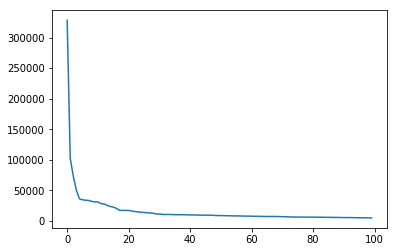

In [30]:
plt.plot(x, frequiences)

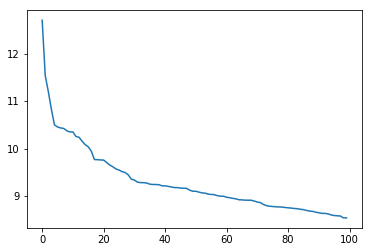

In [31]:
plt.plot(x, np.log(frequiences))

In [32]:
def prob_1(word):
    return words_count[word]/len(TOKEN)

In [33]:
prob_1('擦')

4.9217080954971716e-05

In [34]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN)-1)]

In [35]:
TOKEN_2_GRAM

['吴京意淫',
 '意淫到',
 '到了',
 '了脑残',
 '脑残的',
 '的地步',
 '地步看',
 '看了',
 '了恶心',
 '恶心想',
 '想吐',
 '吐首映礼',
 '首映礼看',
 '看的',
 '的太',
 '太恐怖',
 '恐怖了',
 '了这个',
 '这个电影',
 '电影不讲道理',
 '不讲道理的',
 '的完全',
 '完全就是',
 '就是吴京',
 '吴京在',
 '在实现',
 '实现他',
 '他这个',
 '这个小',
 '小粉红',
 '粉红的',
 '的英雄',
 '英雄梦',
 '梦各种',
 '各种装备',
 '装备轮番',
 '轮番上场',
 '上场视',
 '视物理',
 '物理逻辑',
 '逻辑于',
 '于不顾',
 '不顾不得不',
 '不得不说',
 '说有钱',
 '有钱真',
 '真好',
 '好随意',
 '随意胡闹',
 '胡闹吴京',
 '吴京的',
 '的炒作',
 '炒作水平',
 '水平不输',
 '不输冯小刚',
 '冯小刚但小刚',
 '但小刚至少',
 '至少不会',
 '不会用',
 '用主旋律',
 '主旋律来',
 '来炒作',
 '炒作吴京',
 '吴京让',
 '让人',
 '人看',
 '看了',
 '了不',
 '不舒服',
 '舒服为了',
 '为了主旋律',
 '主旋律而',
 '而主旋律',
 '主旋律为了',
 '为了煽情',
 '煽情而',
 '而煽情',
 '煽情让',
 '让人',
 '人觉得',
 '觉得他',
 '他是',
 '是个',
 '个大',
 '大做作',
 '做作大',
 '大谎言',
 '谎言家',
 '家729',
 '729更新',
 '更新片子',
 '片子整体',
 '整体不如',
 '不如湄公河',
 '湄公河行动',
 '行动1',
 '1整体',
 '整体不够',
 '不够流畅',
 '流畅编剧',
 '编剧有毒',
 '有毒台词',
 '台词尴尬',
 '尴尬2',
 '2刻意',
 '刻意做作',
 '做作的',
 '的主旋律',
 '主旋律煽情',
 '煽情显得',
 '显得如此',
 '如此不合时宜',
 '不合时宜而',
 '而又',
 '又多余',
 '多余凭良心说',
 '凭良心说好',
 '好看到'

In [36]:
word_count_2 = Counter(TOKEN_2_GRAM)

In [37]:
word_count_2

Counter({'吴京意淫': 3,
         '意淫到': 3,
         '到了': 1120,
         '了脑残': 5,
         '脑残的': 40,
         '的地步': 118,
         '地步看': 3,
         '看了': 4585,
         '了恶心': 16,
         '恶心想': 4,
         '想吐': 99,
         '吐首映礼': 1,
         '首映礼看': 4,
         '看的': 7106,
         '的太': 610,
         '太恐怖': 29,
         '恐怖了': 26,
         '了这个': 478,
         '这个电影': 525,
         '电影不讲道理': 1,
         '不讲道理的': 6,
         '的完全': 118,
         '完全就是': 138,
         '就是吴京': 2,
         '吴京在': 4,
         '在实现': 2,
         '实现他': 2,
         '他这个': 17,
         '这个小': 39,
         '小粉红': 5,
         '粉红的': 1,
         '的英雄': 185,
         '英雄梦': 11,
         '梦各种': 1,
         '各种装备': 1,
         '装备轮番': 1,
         '轮番上场': 4,
         '上场视': 1,
         '视物理': 1,
         '物理逻辑': 1,
         '逻辑于': 1,
         '于不顾': 6,
         '不顾不得不': 1,
         '不得不说': 259,
         '说有钱': 1,
         '有钱真': 6,
         '真好': 482,
         '好随意': 3,
         '随意胡闹': 1,
         '胡闹吴京': 1,
 

In [38]:
def prob_2(word_1, word_2):
    return word_count_2(word_1+word_2)/len(TOKEN_2_GRAM) if word_1+word_2 in word_count_2 else 1/len(TOKEN_2_GRAM)

In [39]:
prob_2('吴', '京')

2.2270177337422138e-07

## 使用文章文件分词

In [40]:
TOKEN_2 = []
for i, line in enumerate(open(r'C:\Users\zhang\Desktop\jupyters_and_slides\2019-summer\article_9k.txt', mode='r', encoding='utf-8')):
    if i % 1000 == 0:
        print(i)
    line = ''.join(re.findall('\w+', line))
    TOKEN_2 += jieba.cut(line)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000


In [41]:
word_count_text = Counter(TOKEN_2)

In [42]:
word_count_text.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

In [43]:
TOKEN_2_2_GRAM = [''.join(TOKEN_2[i:i+2]) for i in range(len(TOKEN_2)-1)]

In [44]:
word_count_text_2 = Counter(TOKEN_2_2_GRAM)

In [45]:
word_count_text_2.most_common(10)

[('n新华社', 74664),
 ('2017年', 61480),
 ('外代二线', 61301),
 ('日n', 52293),
 ('新华社照片', 50401),
 ('5月', 37977),
 ('4月', 34571),
 ('新华社记者', 30864),
 ('２０', 27166),
 ('日在', 27154)]

In [46]:
def prob_2_test(word_1, word_2):
    return word_count_text_2[word_1+word_2] / len(TOKEN_2_2_GRAM) if word_1+word_2 in word_count_text_2 else 1 / len(TOKEN_2_2_GRAM)

In [47]:
def get_probablity_1(sent):
    words = list(jieba.cut(sent))
    
    prob = 1
    for i, w in enumerate(words[:-1]):
        prob *= prob_2_test(words[i], words[i+1])
    
    return prob

In [48]:
def get_probablity_2(sent):
    sent = ''.join(re.findall('\w+',sent))
    words = list(jieba.cut(sent))
    
    prob = 1
    for i, w in enumerate(words[:-1]):
        prob *= prob_2_test(words[i], words[i+1])
    
    return prob

In [49]:
list(jieba.cut(''.join(re.findall('\w+', '你好我是94号,您需要打猎吗？'))))

['你好', '我', '是', '94', '号', '您', '需要', '打猎', '吗']

In [50]:
get_probablity_1( '你好我是94号,您需要打猎吗？')

2.494603763445242e-69

In [51]:
get_probablity_2( '你好我是94号,您需要打猎吗？')

7.664752144733774e-55

In [66]:
frequiences = [f for _, f in word_count_text.most_common()]

In [67]:
frequiences[:10]

[703716,
 382020,
 263597,
 189330,
 166300,
 142462,
 134061,
 123106,
 121938,
 100909]

In [68]:
x = list(range(len(word_count_text)))

In [69]:
len(frequiences)

273632

In [70]:
len(x)

273632

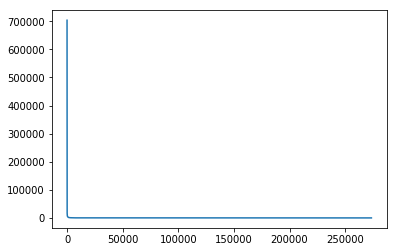

In [71]:
plt.plot(x, frequiences)

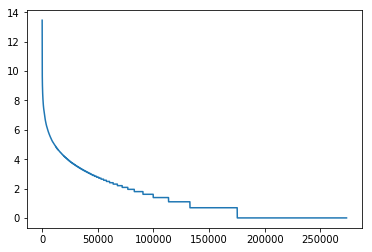

In [72]:
plt.plot(x, np.log(frequiences))

## 建立以及试验generate_best函数

In [54]:
import jieba
import re
from collections import Counter
from random import choice

def create_grammar(simple_grammar, split='=>', line_split='\n'):
    simple_grammar_list = simple_grammar.strip().split(line_split)
    grammar = {}
    for s in simple_grammar_list:
        exp, stmt = s.split(split)
        grammar[exp.strip()] = [sub_gram.split() for sub_gram in stmt.split('|')]
    return grammar

def generate(grammar, target):
    if not target in grammar:
        return target
    expand = [generate(grammar,t) for t in choice(grammar[target])]
    return ''.join([e if e != '/n' else '\n' for e in expand if e != 'null'])

def prob_1(word):
    return words_count[word]/len(TOKEN)

def prob_2(word_1, word_2):
    return words_count_2[word_1+word_2] / len(TOKEN_2) if word_1+word_2 in words_count_2 else 1 / len(TOKEN_2)

def get_probablity(sent, model='1-gram'):
    sent = ''.join(re.findall('\w+',sent))
    words = list(jieba.cut(sent))
    prob = 1
    if model == '2-gram':
        for i, w in enumerate(words[:-1]):
            prob *= prob_2(words[i], words[i+1])
    else:
        for w in words:
            prob *= prob_1(w)
    return prob

def generate_best(simple_grammar, target, split='=>', line_split='\n', model='1-gram', n=1): # you code here
    grammar = create_grammar(simple_grammar, split, line_split)
    # prob_func = prob_2 if model == '2-gram' else prob_1
    sent_score_list = []
    for i in range(n):
        sent = generate(grammar, target)
        prob = get_probablity(sent, model)
        sent_score = (sent, prob)
        sent_score_list.append(sent_score)
    # return [sent_score_list, max(sent_score_list, key=lambda x:x[1])]
    return max(sent_score_list, key=lambda x:x[1])

In [55]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""
target = 'sentence'

In [56]:
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""
target_2 = 'host'

In [57]:
TOKEN = []
for i, line in enumerate(open(r'C:\Users\zhang\Desktop\jupyters_and_slides\2019-summer\article_9k.txt', mode='r', encoding='utf-8')):
    if i % 10000 == 0:
        print(i)
    line = ''.join(re.findall('\w+', line))
    TOKEN += jieba.cut(line)

0
10000
20000
30000
40000
50000
60000
70000
80000


In [58]:
words_count = Counter(TOKEN)

In [59]:
TOKEN_2 = [''.join(TOKEN[i:i+2]) for i in  range(len(TOKEN)-1)]

In [60]:
words_count_2 = Counter(TOKEN_2)

In [62]:
generate_best(simple_grammar=host, target=target_2, split='=', model='2-gram', n=1000000)

('你好我是5号,您需要打猎吗？', 4.882447116195415e-51)